#Setup

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
import math
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [164]:
ksize = 5
sigma = 8

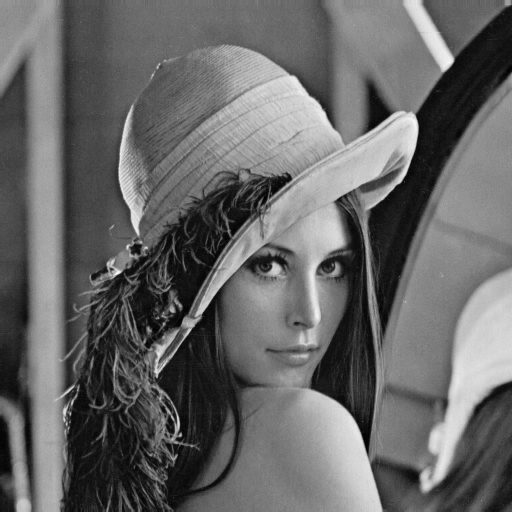

In [165]:
img = cv.imread("/content/drive/My Drive/VIP/lenna.jpg",0)

cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

#Gaussian filtering

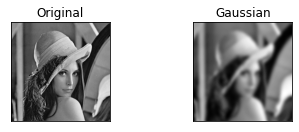

In [166]:
#SKIMAGE

from skimage.filters import gaussian

filtered_img = gaussian(img, sigma=sigma)


plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(filtered_img,cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.show()


#Gradient magnitude computation

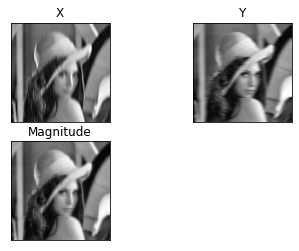

In [167]:
#SKIMAGE
#https://stackoverflow.com/questions/58770274/how-to-get-first-and-second-derivative-matrix-of-an-image

from scipy.ndimage.filters import gaussian_filter

scalar_sqrt = np.vectorize(math.sqrt)
scalar_pow = np.vectorize(math.pow)

x_derivative = gaussian_filter(img, sigma=(sigma, 0))
y_derivative = gaussian_filter(img, sigma=(0, sigma))
magnitude = scalar_sqrt(scalar_pow(x_derivative, 2) + scalar_pow(y_derivative, 2))
#ndimage

plt.subplot(2,2,1),plt.imshow(x_derivative,cmap = 'gray')
plt.title('X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(y_derivative,cmap = 'gray')
plt.title('Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(magnitude,cmap = 'gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()

#Laplacian-Gaussian filtering

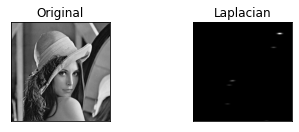

In [168]:
#SKIMAGE

from scipy import ndimage

laplacian = ndimage.gaussian_laplace(img, sigma=sigma)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

#Canny (or similar) edge detection

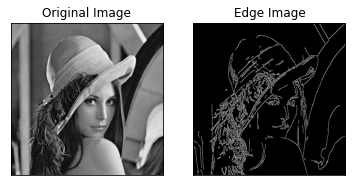

In [169]:
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()